<img src="http://www.leadtraining.com.mt/excel-courses/images/time-series-forecaster.png" alt="Drawing" align="right" style="width: 100px;"/>
# Time series analysis with Python II (*by Hrant Davtyan*)
<br/>

[ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) (AutoRegressive Integrated Moving-Average) model is one of the most famous models applied in Time Series Analysis. This model is the combination of AR and MA models and has the following mathematical representation: <br/>
<br/>
**$$Y_{t}= μ + Φ_{1}Y_{t-1} + ... + Φ_{p}Y_{t-p} + θ_{1}e_{t-1} + ... + θ_{q}e_{t-q}$$** 
where:
- μ is the constant term,
- all variables with a **`Φ`** coefficient are the AR components (Aurotegressive),
- all variables with a **`θ`** coefficient are the MA components (Moving Average).

As can be seen from the functional form abobe, the number of AR components is respresented by **`p`** and the number of MA components by **`q`**. Those p and q are 2 of the 3 important arguments, that ARIMA model requires to provide. The third argument is **`d`**, which represents the number of lagged differences required for data stationarization (refer to Part 1, for more details on stationarity and differencing). So we can summarize that ARIMA(p,d,q) model requires the 3 arguments which, respectively, present the number of AR components (p), the number of lagged differences in data (d) and the number of MA components (q).

To apply the model and make predictions, there are 4 important steps required to take:
1. [Importing libraries, reading data, transforming data](#section1)
2. [Plotting PACF and ACF to determine p and q](#section2)
3. [Applying ARIMA model](#section3)
4. [Saving predictions, transforming and plotting](#section4)

<a id='section1'></a>
### *1. Importing libraries, reading data, transforming data*

In [24]:
# importing necessary libraries
import pandas as pd # to present the data
import numpy as np # to perform mathematical transformation
import matplotlib.pyplot as plt # make plots
# to present plots inline with the code (on the same page)
%matplotlib inline

In [25]:
from statsmodels.tsa.arima_model import ARIMA # ARIMA model
from statsmodels.tsa.stattools import acf, pacf #ACF and PACF, which are later explained

In [26]:
data = pd.read_csv(r'C:\Users\Legion\Downloads\AirPassengers.csv',parse_dates=['Month'], index_col='Month')
# showing the first 5 observations of the data
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


As this is the same dataset introduced in the first part, we will skip the plots and directly transform our data first by applying logarithmic transformation and then by calculating the one-period difference. Please, refer to part 1 for more details on this.

In [27]:
# apply logarithmic transformation to the dataset
log_data = np.log(data)
# calculate the one-period difference
log_data_lagged = log_data - log_data.shift()
# drop the missing values (the very first row, as it has no value because of differencing)
log_data_lagged.dropna(inplace=True)

<a id='section2'></a>
### *2. Plotting PACF and ACF to determing p and q*

As it was described above, ARIMA model has 3 important/required arguments. The 2nd argument, d, is the number of lagged differences. In out case, as we calculated only one-period difference, d=1. What is left now, is to find the right values for p and q. For that purpose, one needs to understand what are PACF (Partial Autocorrelation Function) and ACF (Autocorrelation Function).

In the above presented mathematical model, we are interested to include only those components of AR process, that have significant correlation with our target variable **`Yt`**. The correlation of a variable with its own values from other period of time is known as autocorrelation. As the correlation between **`Yt`** and **`Yt-2`** can be exagerated because of a third variable **`Yt-1`**, we are more interested to estimate the partial autocorrelation, which will separate the effect of any third variable. The value of p will be equal to number of periods, which have significant (**partial**) correlation with the target variable **`Yt`**. The significance can be determined using confidence intervals (presented below).

A similar process is used for determining the value for q. However, for the MA process, which consists of residuals, one is should use the ACF instead of PACF. The value of q will be equal to the number of perios, which have significant correlation with the target variable **`Yt`**.

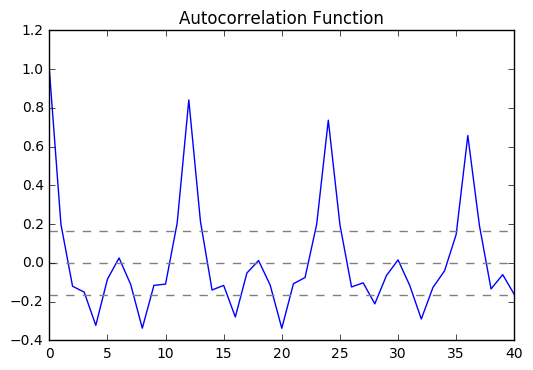

In [28]:
# Plot ACF with confidence treshholds

acf = acf(log_data_lagged) # calculating autocorrelation
plt.plot(acf) # plotting autocrrelation function (ACF)
plt.axhline(y=0,linestyle='--',color='gray') # plotting a horizontal line at y=0 point
# plotting the upper bound of the confidence interval, which is a horizontal line at 1.96/sqrt(n)
plt.axhline(y=-1.96/np.sqrt(len(log_data_lagged)),linestyle='--',color='gray')
# plotting the lower bound of the confidence interval, which is a horizontal line at -1.96/sqrt(n)
plt.axhline(y=1.96/np.sqrt(len(log_data_lagged)),linestyle='--',color='gray')
# providing title for our plot
plt.title('Autocorrelation Function')

As can be seen from the graph above, the ACF function intersects the confidence interval for the very first time during the (nearly) 2nd period. This implies that q=2 (number of MA components).
Note: the confidence intervals above were calculated using the following statistical formula:

<img src="https://s-media-cache-ak0.pinimg.com/736x/a0/3c/65/a03c650ea3ae2f6ccccfba82ba6ef5bd.jpg" alt="Drawing" align="center" style="width: 150px;"/>

In our case mean is 0, while the standrd deviation is 1, because we are dealing with correlations. The value of n is the length of our data, and Z score is 1.96 for 95% confidence interval. 

Let's now apply the same approach for PACF, which will provide as the values for p, i.e. number of AR components.

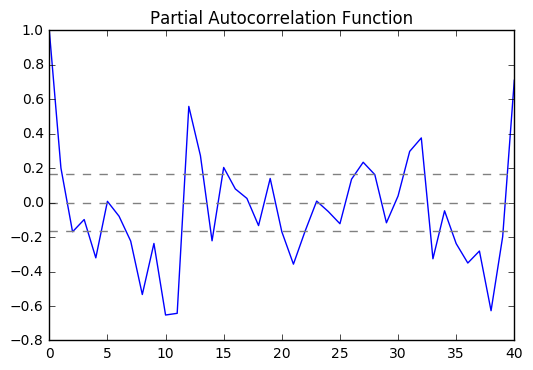

In [29]:
# Plot PACF with confidence bounds
log_pacf = pacf(log_data_lagged) # calculating partial autocorrelation
plt.plot(log_pacf) # plotting partial autocorrelation function (PACF)
plt.axhline(y=0,linestyle='--',color='gray') # plotting a horizontal line at y=0 point
# plotting the upper bound of the confidence interval, which is a horizontal line at 1.96/sqrt(n)
plt.axhline(y=-1.96/np.sqrt(len(log_data_lagged)),linestyle='--',color='gray')
# plotting the lower bound of the confidence interval, which is a horizontal line at 1.96/sqrt(n)
plt.axhline(y=1.96/np.sqrt(len(log_data_lagged)),linestyle='--',color='gray')
# providing title for our plot
plt.title('Partial Autocorrelation Function')

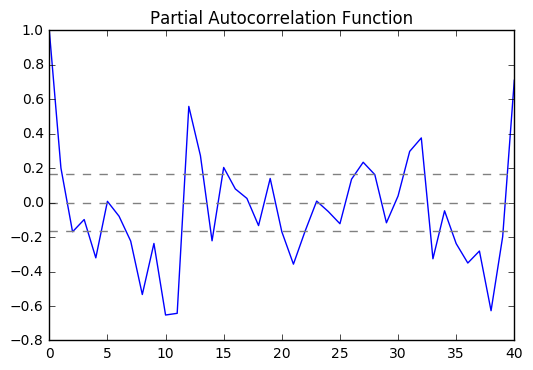

In [13]:
# Plot PACF with tresholds
log_pacf = pacf(log_data_lagged)
plt.plot(log_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_data_lagged)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_data_lagged)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

As can be seen from the graph above, the PACF function intersects the confidence interval for the very first time during the (nearly) 2nd period. This implies that p=2 (number of AR components).

As all 3 arguments are given, we are ready to apply the ARIMA model.

<a id='section3'></a>
### *3. Applying ARIMA model*

Given the (2,1,2) arguments from above (p=2,d=1,q=2), we are already ready to apply the full ARIMA model. But first, let's check what predictions look like with only sperate AR/MA models.

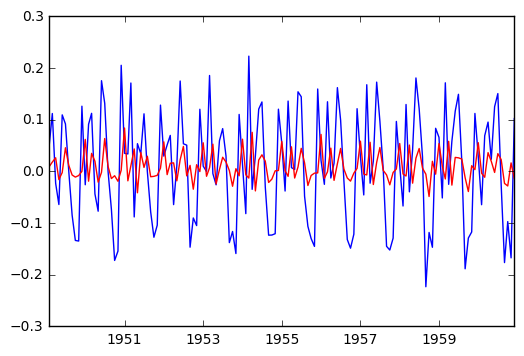

In [30]:
# a separate AR model, as q=0 (no MA component)
model = ARIMA(log_data, order=(2, 1, 0))
# we used log_data in ARIMA function instead of log_data_diff, as d=1 automatically calculates the difference
results_AR = model.fit(disp=-1) # disp<0 assures that no output is displayed
plt.plot(log_data_lagged) # plot the data
plt.plot(results_AR.fittedvalues, color='red') # plotted the fitted AR curve

The plot above shows much better fit that those we had in the first part. Yet, we believe a better fit is still possible to have.

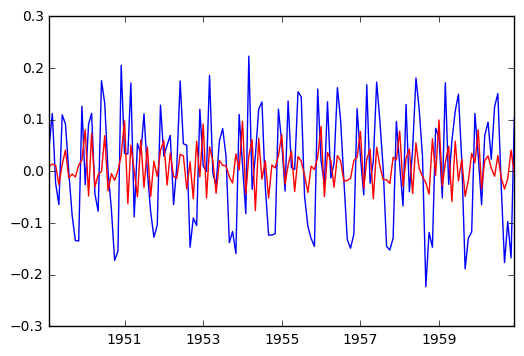

In [31]:
# separate MA model as p=0 (no AR component)
model = ARIMA(log_data, order=(0, 1, 2))  
results_MA = model.fit(disp=-1) # again no output to be displayed, so disp=-1<0
plt.plot(log_data_lagged)
plt.plot(results_MA.fittedvalues, color='red')

It seems the MA model has better fit that AR model. Let's now check the full ARIMA model, i.e. the combination of the two above.

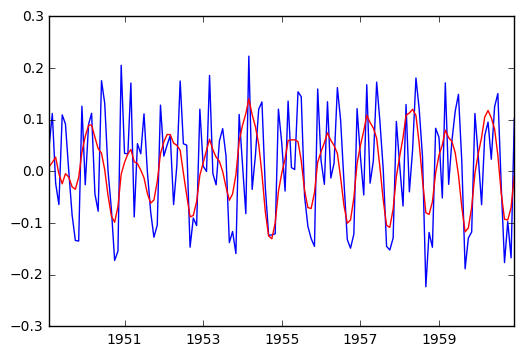

In [32]:
model = ARIMA(log_data, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(log_data_lagged)
plt.plot(results_ARIMA.fittedvalues, color='red')

This plot seems to be the best one among all, as it not only reacts to seasonal fluctuations, but also neglects extreme values, without trying to overfit. Assuming we are done with predictions, now we may want to save them, transform back (because we transformed logarithmically and then differenced) and plot.

<a id='section4'></a>
### *4. Saving, transforming and plotting predictions*

In [33]:
# Let's first save the fittedvalues to a new variable
predictions_log_lag = results_ARIMA.fittedvalues
# To undo the differencing (shifting) we have to calculate the cumulative sum
predictions_almost_log = predictions_log_lag.cumsum()
predictions_almost_log.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

The results are nice, but are not given in a DataFrame format. Instead they are a Pandas Series (anoth data presentation format) which we will convert to DataFrame to have the same format for all.

In [34]:
# check the type, to be sure it is a Series
type(predictions_almost_log)

pandas.core.series.Series

In [35]:
# Convert this series to DataFrame
predictions_almost_log = pd.Series.to_frame(predictions_almost_log)
# check the type to make sure conversion was correct
type(predictions_almost_log)

pandas.core.frame.DataFrame

In [36]:
# Give a name to passengers column, as it did not have a name because of being Series.
predictions_almost_log.columns=["Passengers"]
predictions_almost_log.head()

,Passengers
Month,
1949-02-01,0.009580
1949-03-01,0.027071
1949-04-01,0.054742
1949-05-01,0.050221
1949-06-01,0.026331


Now, our predictions are saved in a dataframe and also we (somewhat) solved the differencing problem. Yet, we have to remember that when differencing we dropped the very first value of the dataset. This means we need to add this value back to all observations and then, add it also as the very first row of the dataset.

In [37]:
# print the very first value
print log_data.ix[0]

Passengers    4.718499
Name: 1949-01-01 00:00:00, dtype: float64


In [38]:
# add that value to all rows
predictions_almost_log = predictions_almost_log + log_data.ix[0]
# show first 5 observations
predictions_almost_log.head()

,Passengers
Month,
1949-02-01,4.728079
1949-03-01,4.745570
1949-04-01,4.773240
1949-05-01,4.768720
1949-06-01,4.744830


As you can see from the dataframe above, the first observation starts from February, 1929. So as it was mentioned above, we need to bring back the very first observation (i.e. January, 1949). We can do that using the Concatenate function from Pandas.

In [39]:
# Concatenate the very first observation and the above dataframe
predictions_log = pd.concat([log_data[0:1],predictions_almost_log])
# Show first 5 observations after concatination
predictions_log.head()

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.728079
1949-03-01,4.745570
1949-04-01,4.773240
1949-05-01,4.768720


It seems we have now the ready data with logarithmic transformation being the only issue needing to be taken care of. The inverse of logarithmic transformation is exponential transformation. Let's apply it using the exp command from numpy library.

In [40]:
# transform back
predictions = np.exp(predictions_log)
# show first 5 observations
predictions.head()

,Passengers
Month,
1949-01-01,112.000000
1949-02-01,113.078122
1949-03-01,115.073412
1949-04-01,118.301978
1949-05-01,117.768354


As you can see now, the dataframe above is quite similar to the very first values we had in our dataset. Those are the final predicted values that we have. To compare them with reality, we can plot both on the same graph as shows below.

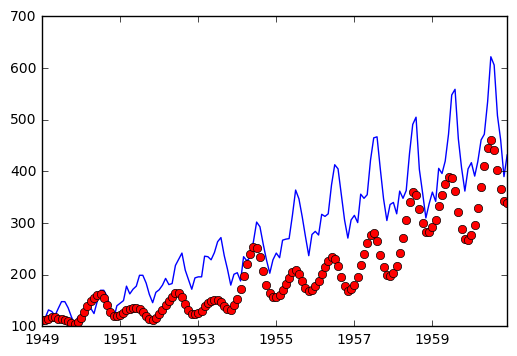

In [41]:
# plot real data
plt.plot(data)
# plot predictions in red circles
plt.plot(predictions,'ro')

# End note

The predictions above are the final one with ARIMA(2,1,2) model, but not necessarily the best one one could make. As you can see, seasonal fluctuations are pretty well fitted, yet, because of the increasing trend we have underestimation (and we would overestimate the reality if there was a decreasing trend instead). One could improve prediction results by varying the values of ARIMA arguments, or by taking into account the seasonal decomposition.